In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'piemonte'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,0.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,15.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,1,Piemonte,2,0,2,0,2,-1,-1,...,0.0,0.0,0.0,-1.0,0.00,100.00,-inf,0.00,0.00,-33.33
3,2020-02-28T18:00:00,1,Piemonte,7,0,7,4,11,9,9,...,0.0,71.0,0.0,4.0,0.00,63.64,12.68,0.00,0.00,450.00
4,2020-02-29T17:00:00,1,Piemonte,7,0,7,4,11,0,0,...,0.0,81.0,0.0,0.0,0.00,63.64,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2021-04-23T17:00:00,1,Piemonte,2447,275,2722,15723,18445,-687,1099,...,19.0,25540.0,5966.0,-561.0,10.10,14.76,4.30,18.42,-1.79,-3.59
424,2021-04-24T17:00:00,1,Piemonte,2443,267,2710,14941,17651,-794,821,...,20.0,25008.0,6675.0,-782.0,9.85,15.35,3.28,12.30,-2.91,-4.30
425,2021-04-25T17:00:00,1,Piemonte,2403,260,2663,14810,17473,-178,978,...,13.0,13888.0,4854.0,-131.0,9.76,15.24,7.04,20.15,-2.62,-1.01
426,2021-04-26T17:00:00,1,Piemonte,2404,247,2651,14438,17089,-384,568,...,21.0,11954.0,2865.0,-372.0,9.32,15.51,4.75,19.83,-5.00,-2.20


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 27, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 667
Nuovi tamponi: 17736.0
Percentuale nuovi positivi/nuovi tamponi: 3.8 %
Nuovi guariti: 965.0
Nuovi deceduti: 27.0
Variazione positivi ricoverati con sintomi: -96.0
Variazione positivi in terapia intensiva: -7.0
Variazione positivi in isolamento dimiciliare: -222.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 27, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-26T17:00:00,1,Piemonte,1938,163,2101,13022,15123,800,1526,...,5.0,25724.0,9197.0,770.0,7.76,13.89,5.93,16.59,0.62,5.59
1,2021-02-27T17:00:00,1,Piemonte,1956,166,2122,13521,15643,520,1188,...,14.0,25766.0,6962.0,499.0,7.82,13.57,4.61,17.06,1.84,3.44
2,2021-02-28T17:00:00,1,Piemonte,2015,168,2183,13894,16077,434,902,...,4.0,10733.0,4755.0,373.0,7.70,13.58,8.40,18.97,1.20,2.77
3,2021-03-01T17:00:00,1,Piemonte,2043,175,2218,14403,16621,544,1155,...,6.0,13936.0,4456.0,509.0,7.89,13.34,8.29,25.92,4.17,3.38
4,2021-03-02T17:00:00,1,Piemonte,2139,180,2319,15014,17333,712,1609,...,20.0,23240.0,9930.0,611.0,7.76,13.38,6.92,16.20,2.86,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-04-23T17:00:00,1,Piemonte,2447,275,2722,15723,18445,-687,1099,...,19.0,25540.0,5966.0,-561.0,10.10,14.76,4.30,18.42,-1.79,-3.59
57,2021-04-24T17:00:00,1,Piemonte,2443,267,2710,14941,17651,-794,821,...,20.0,25008.0,6675.0,-782.0,9.85,15.35,3.28,12.30,-2.91,-4.30
58,2021-04-25T17:00:00,1,Piemonte,2403,260,2663,14810,17473,-178,978,...,13.0,13888.0,4854.0,-131.0,9.76,15.24,7.04,20.15,-2.62,-1.01
59,2021-04-26T17:00:00,1,Piemonte,2404,247,2651,14438,17089,-384,568,...,21.0,11954.0,2865.0,-372.0,9.32,15.51,4.75,19.83,-5.00,-2.20


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

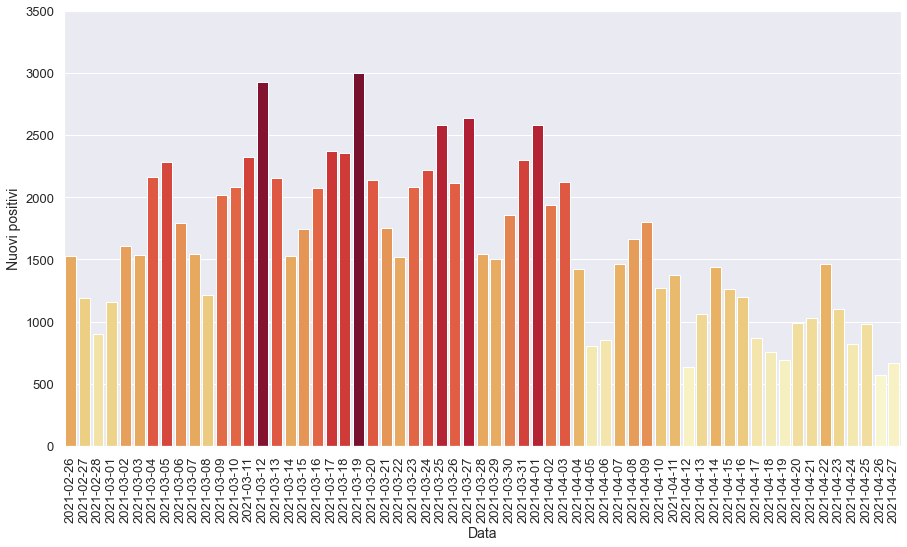

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

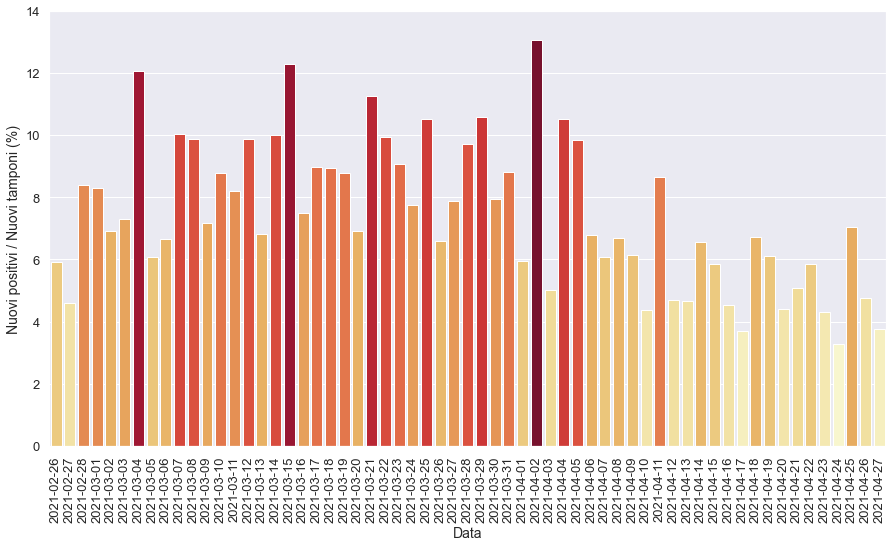

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

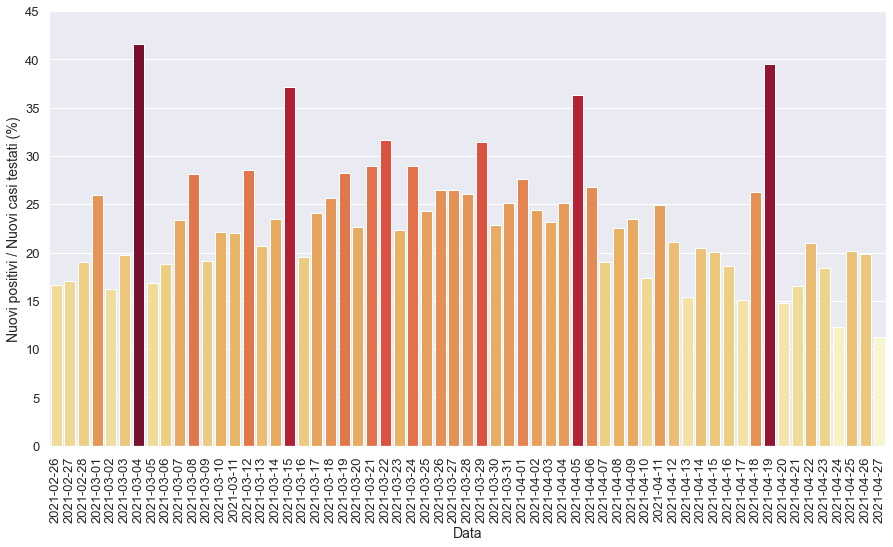

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

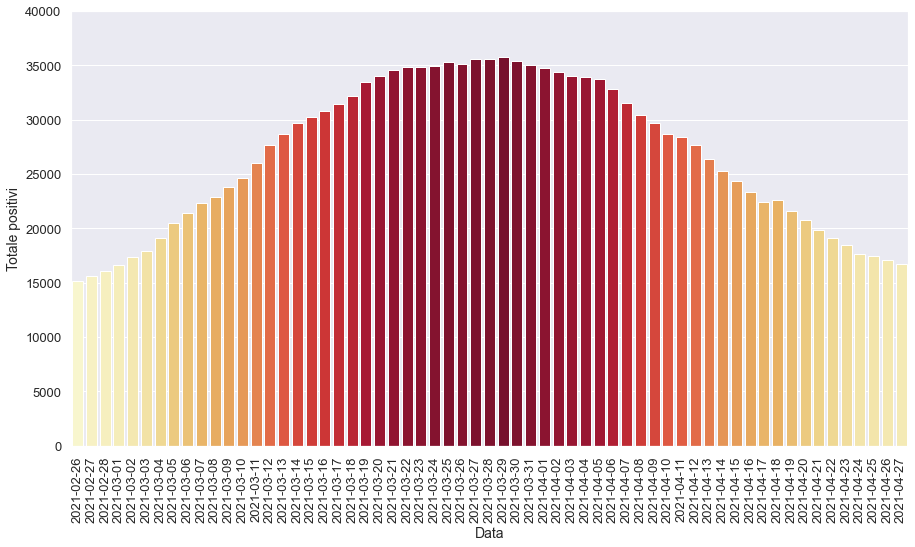

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

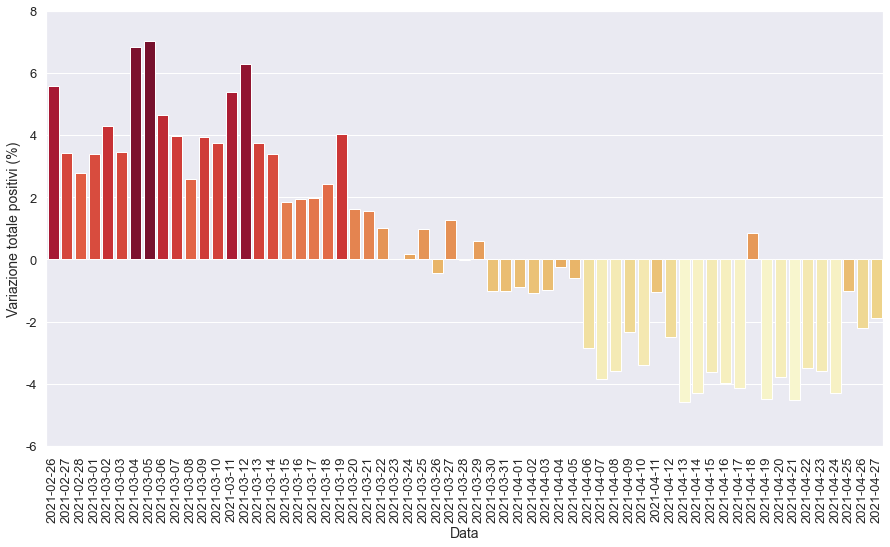

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

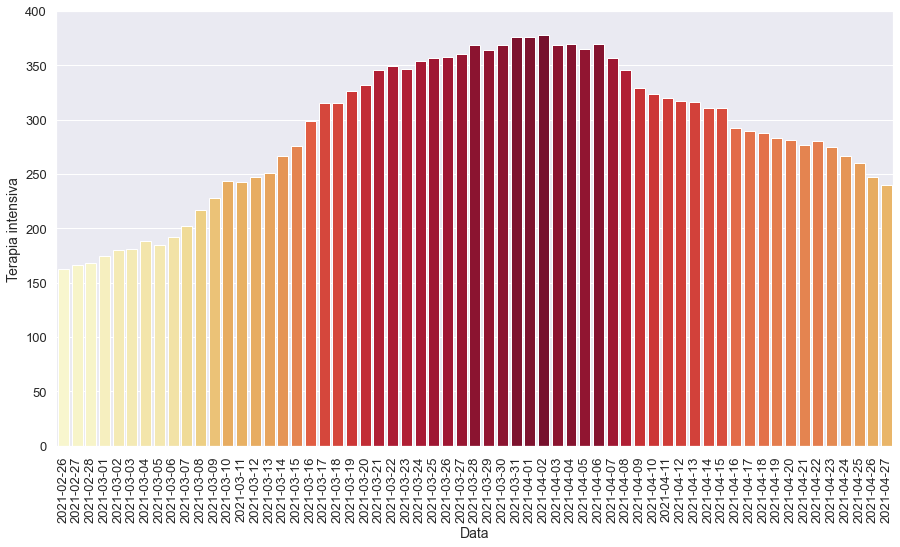

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

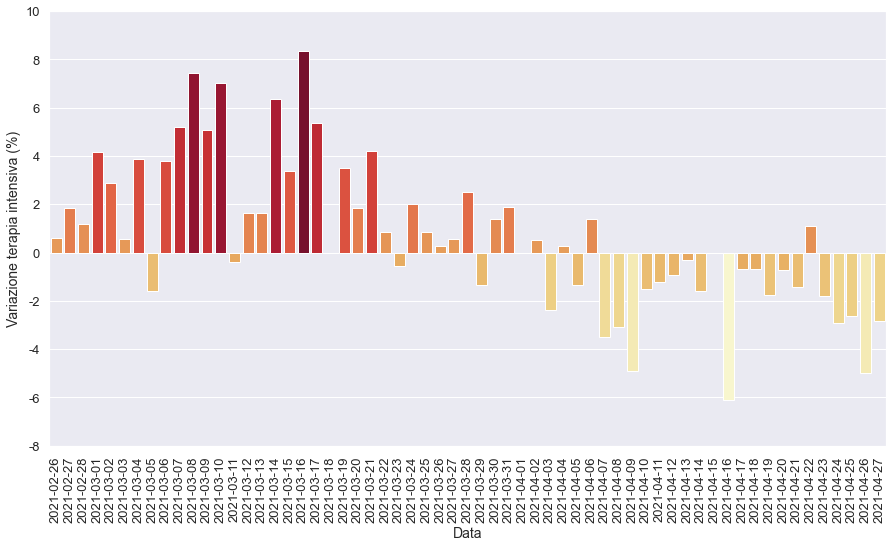

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

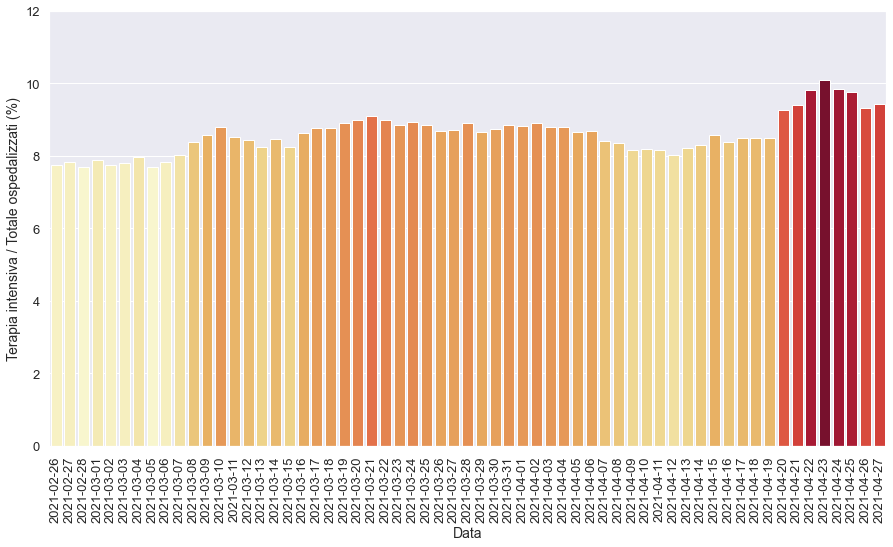

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

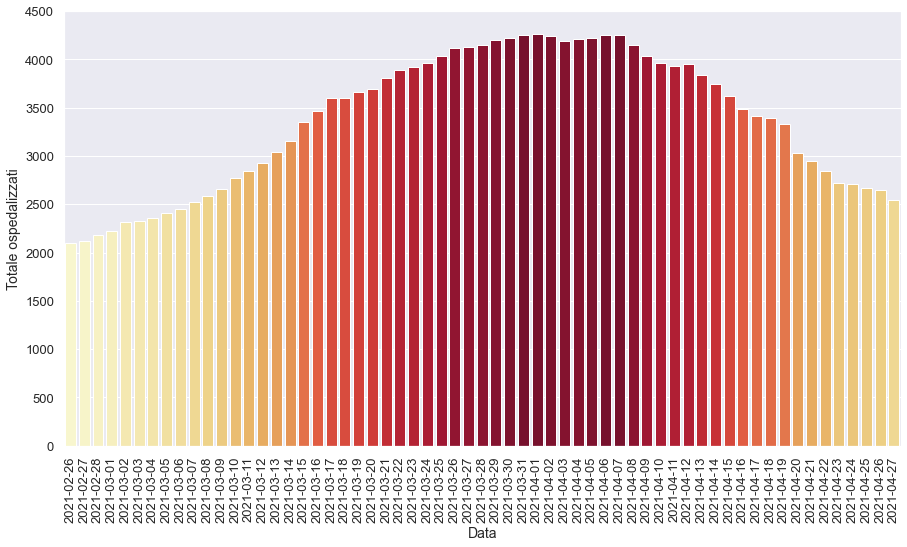

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

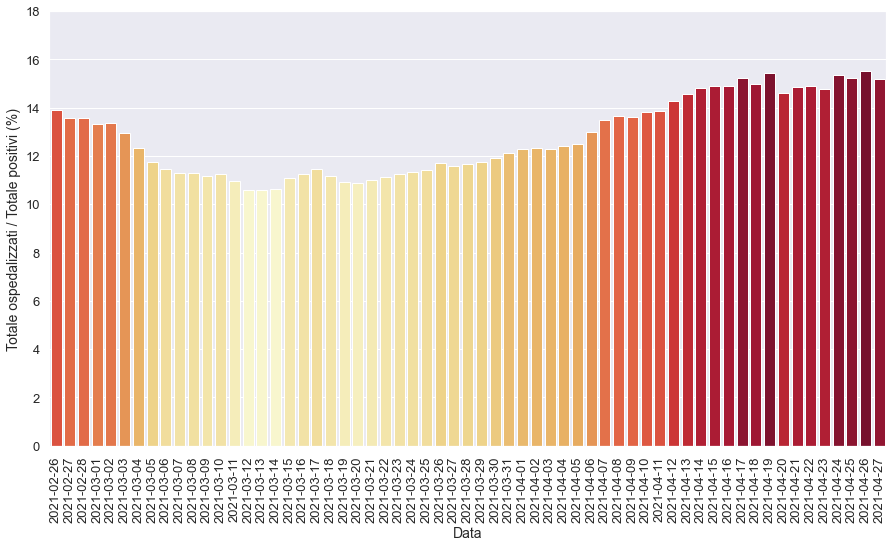

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

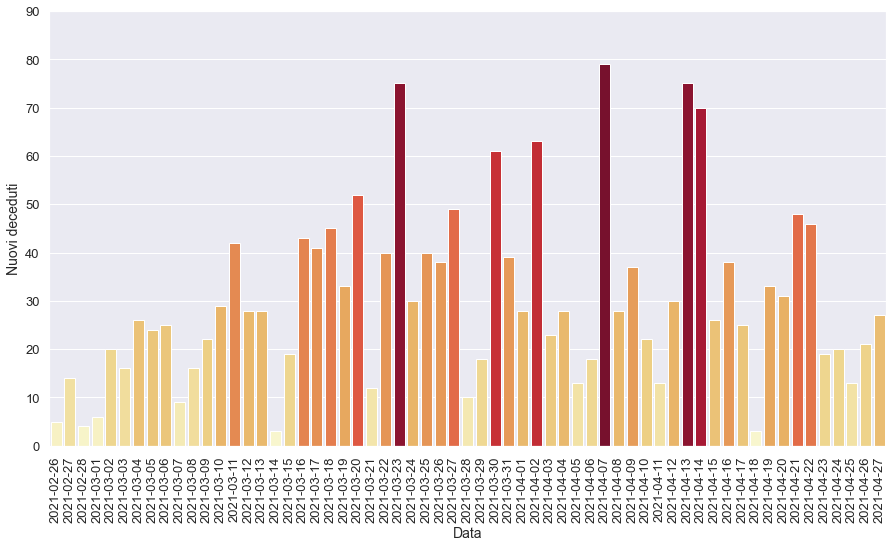

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

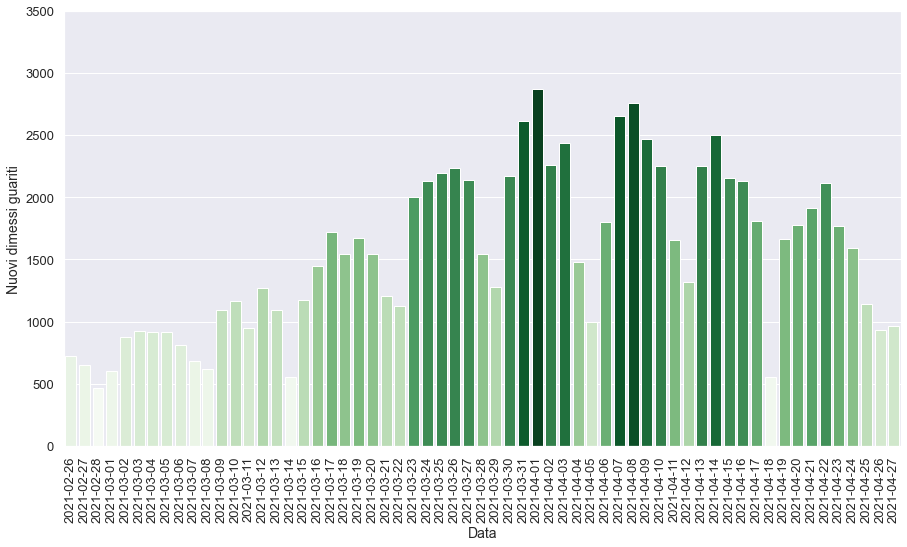

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-28T17:00:00,1,Piemonte,3776,369,4145,31430,35575,-10,1543,...,10.0,15870.0,5914.0,-28.0,8.90,11.65,9.72,26.09,2.50,-0.03
1,2021-03-29T17:00:00,1,Piemonte,3837,364,4201,31584,35785,210,1504,...,18.0,14197.0,4780.0,154.0,8.66,11.74,10.59,31.46,-1.36,0.59
2,2021-03-30T17:00:00,1,Piemonte,3855,369,4224,31193,35417,-368,1861,...,61.0,23439.0,8143.0,-391.0,8.74,11.93,7.94,22.85,1.37,-1.03
3,2021-03-31T17:00:00,1,Piemonte,3873,376,4249,30810,35059,-358,2298,...,39.0,26085.0,9130.0,-383.0,8.85,12.12,8.81,25.17,1.90,-1.01
4,2021-04-01T17:00:00,1,Piemonte,3887,376,4263,30484,34747,-312,2584,...,28.0,43334.0,9354.0,-326.0,8.82,12.27,5.96,27.62,0.00,-0.89
5,2021-04-02T17:00:00,1,Piemonte,3864,378,4242,30127,34369,-378,1942,...,63.0,14884.0,7962.0,-357.0,8.91,12.34,13.05,24.39,0.53,-1.09
6,2021-04-03T17:00:00,1,Piemonte,3819,369,4188,29848,34036,-333,2127,...,23.0,42325.0,9180.0,-279.0,8.81,12.30,5.03,23.17,-2.38,-0.97
7,2021-04-04T17:00:00,1,Piemonte,3837,370,4207,29748,33955,-81,1425,...,28.0,13545.0,5667.0,-100.0,8.79,12.39,10.52,25.15,0.27,-0.24
8,2021-04-05T17:00:00,1,Piemonte,3851,365,4216,29537,33753,-202,804,...,13.0,8158.0,2217.0,-211.0,8.66,12.49,9.86,36.27,-1.35,-0.59
9,2021-04-06T17:00:00,1,Piemonte,3882,370,4252,28536,32788,-965,852,...,18.0,12531.0,3177.0,-1001.0,8.70,12.97,6.80,26.82,1.37,-2.86


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

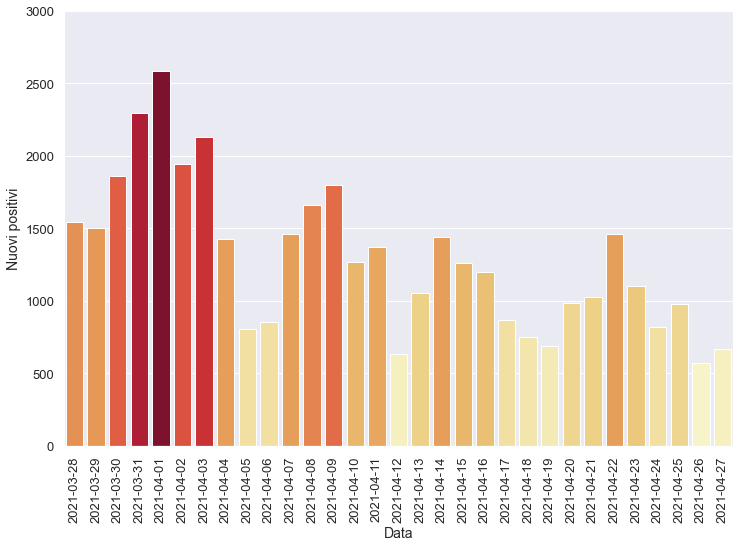

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

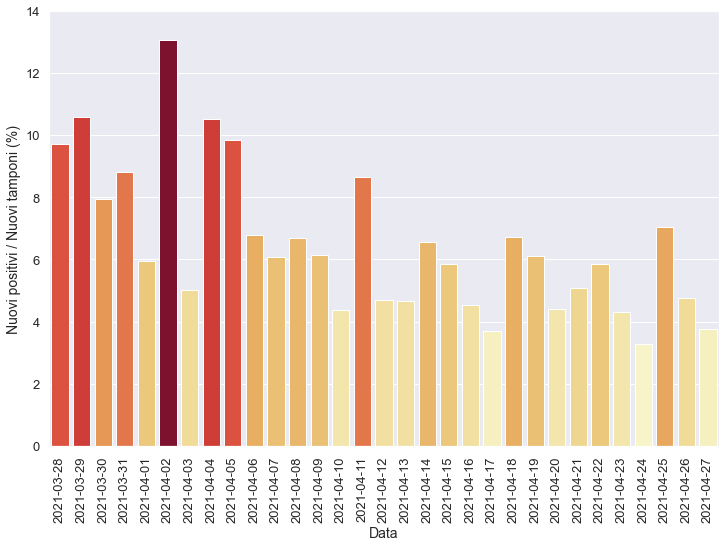

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

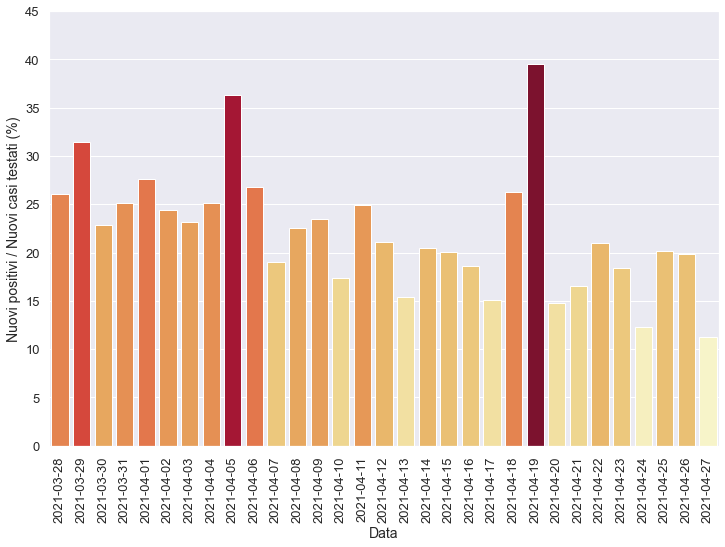

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

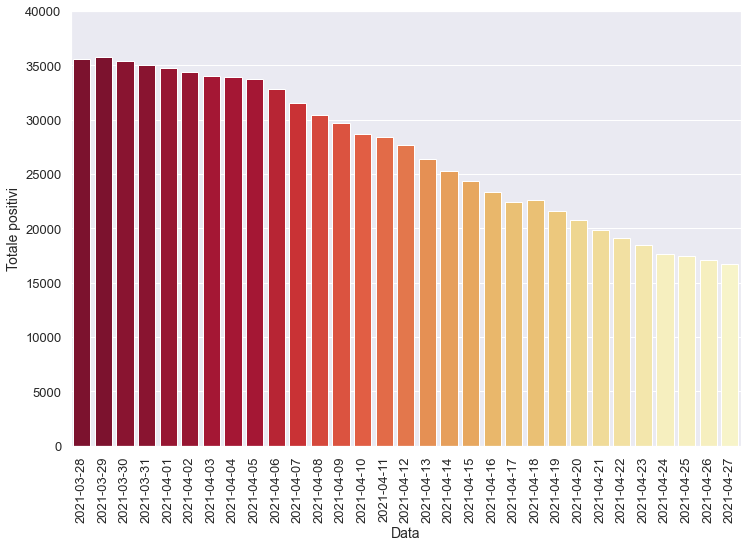

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

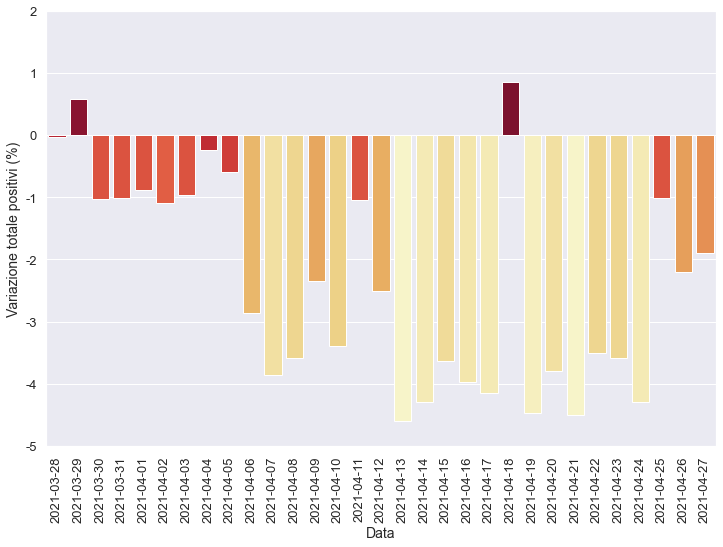

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

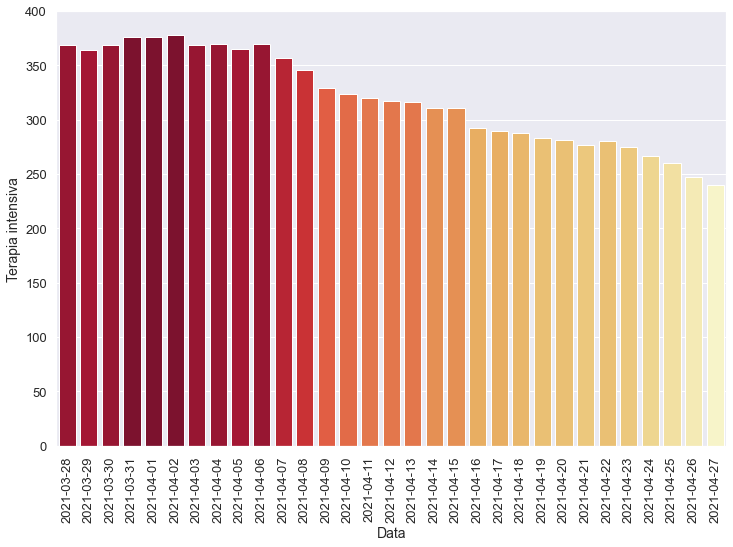

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

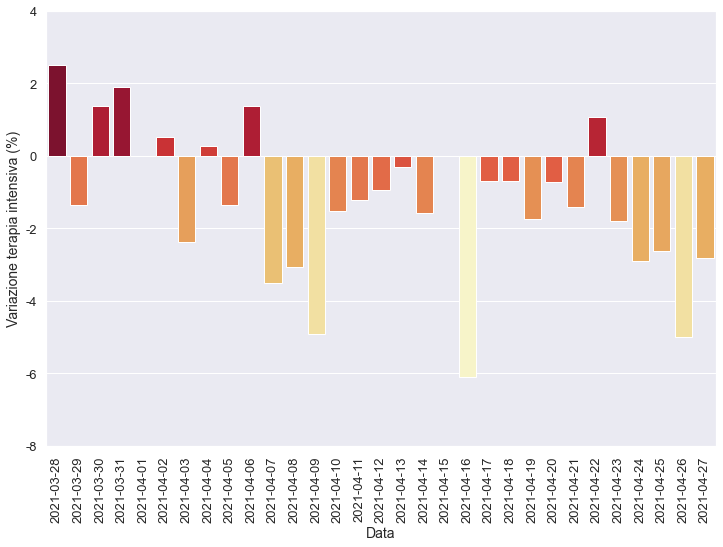

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

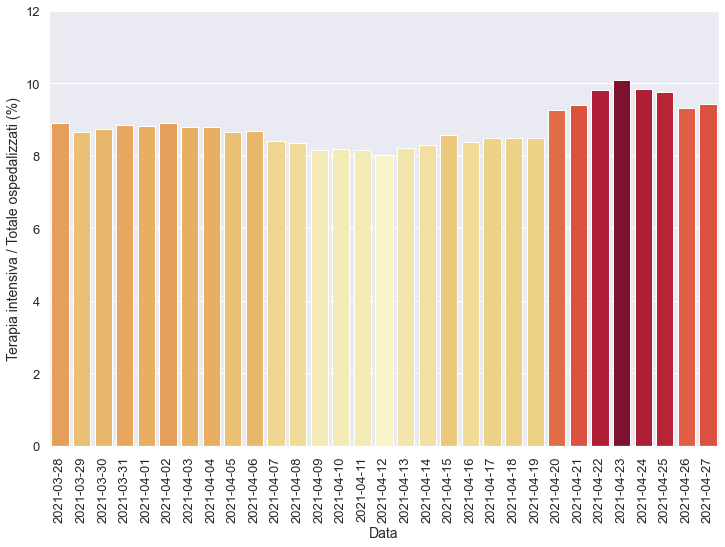

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

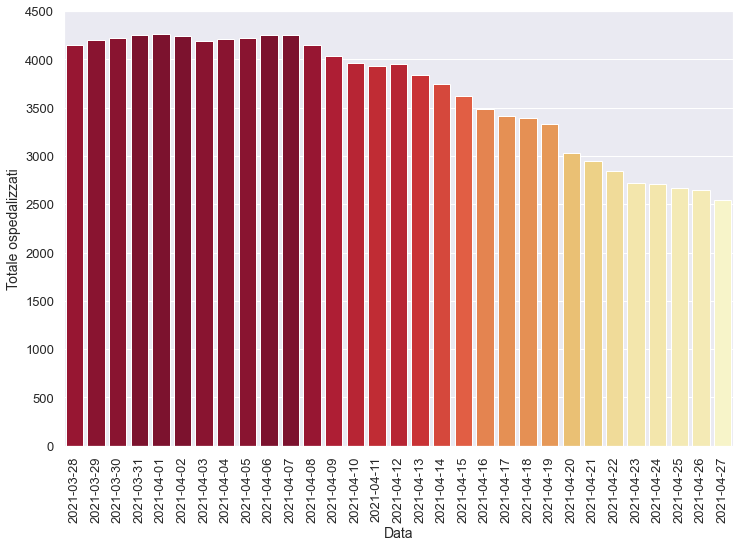

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

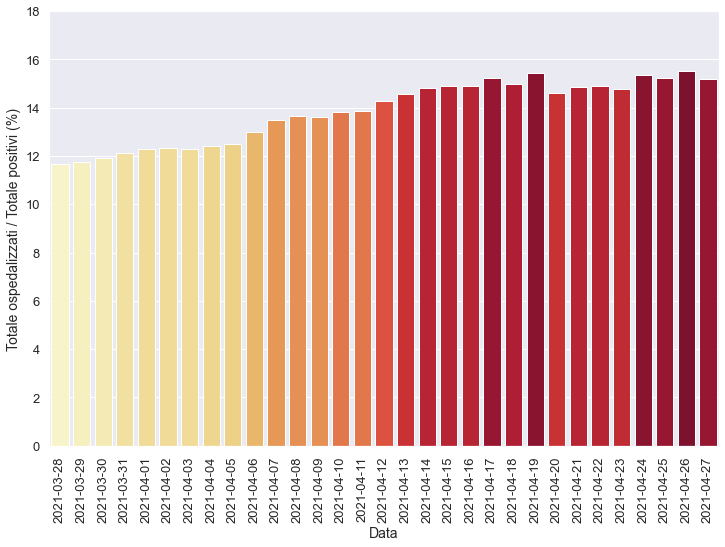

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

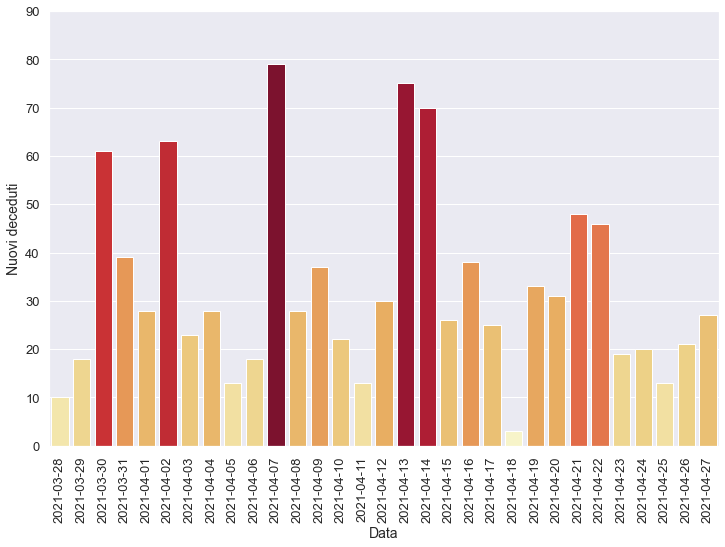

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

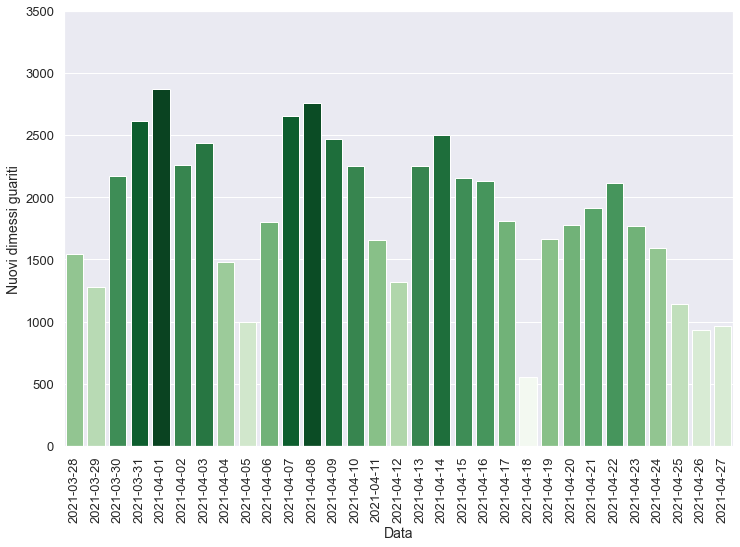

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-04-20T17:00:00,1,Piemonte,2753,281,3034,17730,20764,-820,988,...,31.0,22422.0,6682.0,-526.0,9.26,14.61,4.41,14.79,-0.71,-3.80
1,2021-04-21T17:00:00,1,Piemonte,2666,277,2943,16885,19828,-936,1026,...,48.0,20188.0,6187.0,-845.0,9.41,14.84,5.08,16.58,-1.42,-4.51
2,2021-04-22T17:00:00,1,Piemonte,2568,280,2848,16284,19132,-696,1464,...,46.0,24993.0,6962.0,-601.0,9.83,14.89,5.86,21.03,1.08,-3.51
3,2021-04-23T17:00:00,1,Piemonte,2447,275,2722,15723,18445,-687,1099,...,19.0,25540.0,5966.0,-561.0,10.10,14.76,4.30,18.42,-1.79,-3.59
4,2021-04-24T17:00:00,1,Piemonte,2443,267,2710,14941,17651,-794,821,...,20.0,25008.0,6675.0,-782.0,9.85,15.35,3.28,12.30,-2.91,-4.30
5,2021-04-25T17:00:00,1,Piemonte,2403,260,2663,14810,17473,-178,978,...,13.0,13888.0,4854.0,-131.0,9.76,15.24,7.04,20.15,-2.62,-1.01
6,2021-04-26T17:00:00,1,Piemonte,2404,247,2651,14438,17089,-384,568,...,21.0,11954.0,2865.0,-372.0,9.32,15.51,4.75,19.83,-5.00,-2.20
7,2021-04-27T17:00:00,1,Piemonte,2308,240,2548,14216,16764,-325,667,...,27.0,17736.0,5928.0,-222.0,9.42,15.20,3.76,11.25,-2.83,-1.90


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

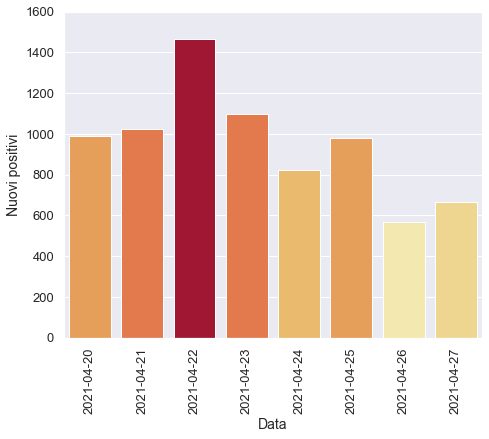

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

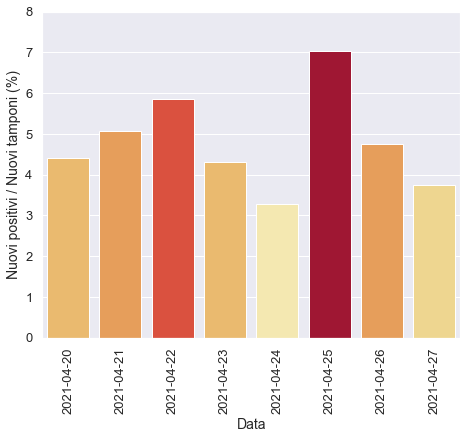

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

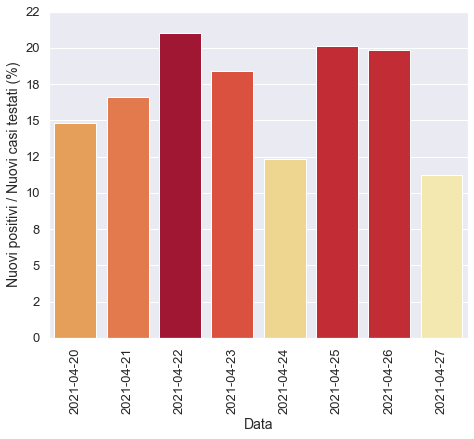

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

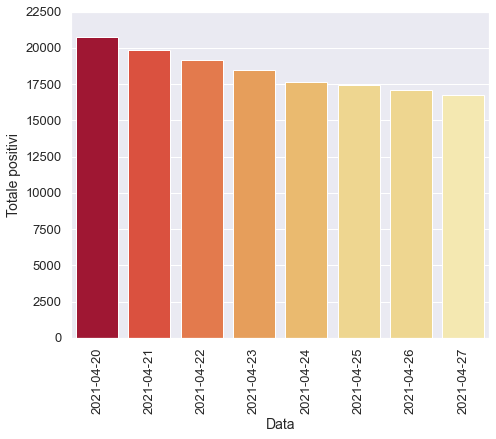

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

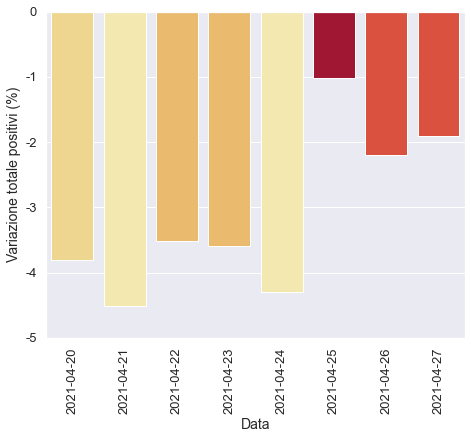

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

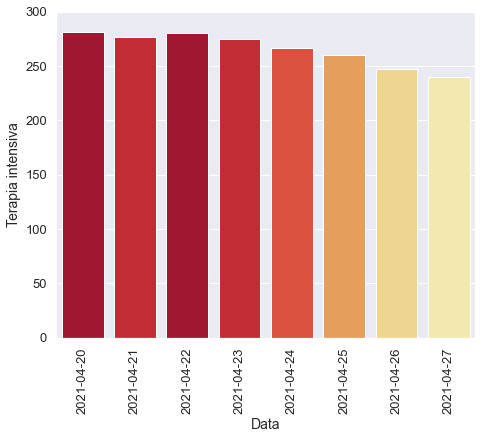

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

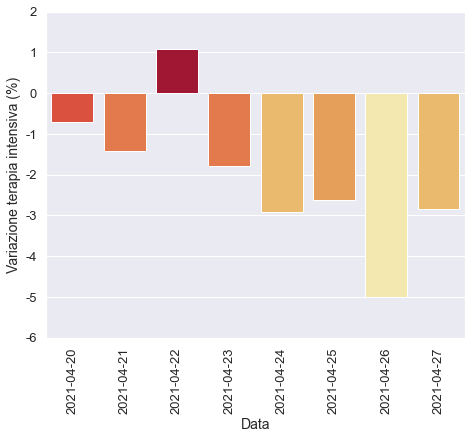

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

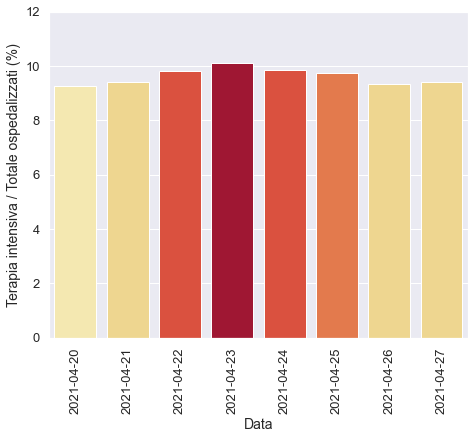

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

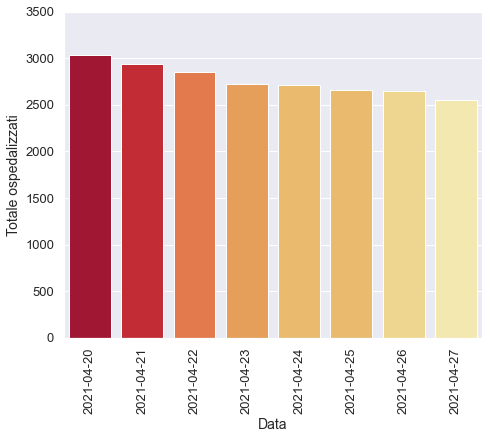

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

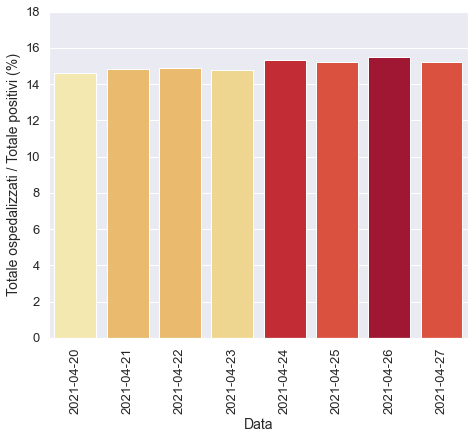

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

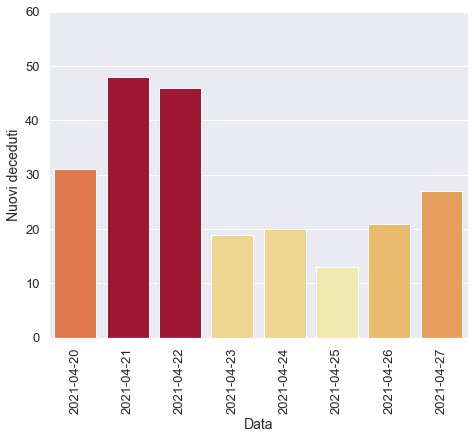

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

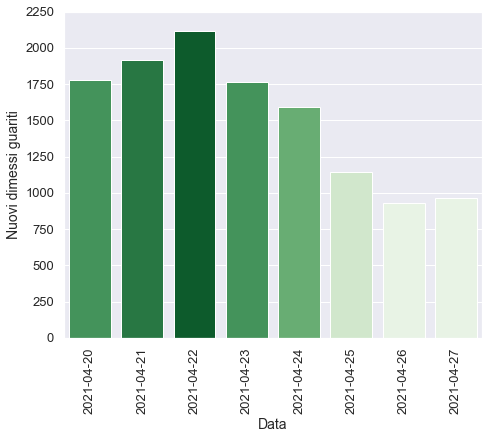

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)